# 1. Data Understanding and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import CSV
bike_share = pd.read_csv("day.csv")
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Here we have a dataset of counts of bikes used across different dates. We also have temp., humidity, windspeed, type of users, and some derived data like, month, year, season, whether its a holiday or workingday or weekday for each day

In [3]:
#looking at the size and checking for null values
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<AxesSubplot:>

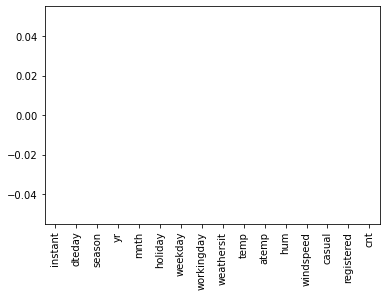

In [4]:
proportions = bike_share.isnull().sum()/bike_share.isnull().count()
proportions.plot(kind = 'bar')

#### The data has 16 columns and 730 rows and no column has any null value.

In [5]:
#Check for columns like instant, dteday
print(bike_share.instant.value_counts())
print(bike_share.dteday.value_counts())

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
03-10-2018    1
17-05-2018    1
13-09-2019    1
10-03-2019    1
30-01-2018    1
             ..
23-12-2018    1
18-08-2018    1
17-09-2018    1
23-06-2019    1
17-12-2018    1
Name: dteday, Length: 730, dtype: int64


#### These columns can be droped as they wont contribute to the data as they are just serial nos. and dates(which can be inferred from the derived variables)

#### casual and registered users are also not required for our analysis as the problem statement suggests only count is the variable we are suppose to predict and not the user types significance. Nevertheless the count is the sum of the users so keeping count will do.

In [6]:
#droping the above mentioned columns
bike_share = bike_share.drop(['instant', 'dteday', 'casual', 'registered'], axis =1)
bike_share

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [7]:
#Let us look at the values of derived columns like season, holiday, etc
cat_col = list(bike_share.columns[:7])
value_counts_derived = bike_share[cat_col].apply(pd.value_counts)
print(value_counts_derived)


    season     yr  mnth  holiday  weekday  workingday  weathersit
0      NaN  365.0   NaN    709.0    105.0       231.0         NaN
1    180.0  365.0  62.0     21.0    105.0       499.0       463.0
2    184.0    NaN  56.0      NaN    104.0         NaN       246.0
3    188.0    NaN  62.0      NaN    103.0         NaN        21.0
4    178.0    NaN  60.0      NaN    104.0         NaN         NaN
5      NaN    NaN  62.0      NaN    104.0         NaN         NaN
6      NaN    NaN  60.0      NaN    105.0         NaN         NaN
7      NaN    NaN  62.0      NaN      NaN         NaN         NaN
8      NaN    NaN  62.0      NaN      NaN         NaN         NaN
9      NaN    NaN  60.0      NaN      NaN         NaN         NaN
10     NaN    NaN  62.0      NaN      NaN         NaN         NaN
11     NaN    NaN  60.0      NaN      NaN         NaN         NaN
12     NaN    NaN  62.0      NaN      NaN         NaN         NaN


#### We can clearly see that the values which we saw as int type for these columns are actually categories. Whose significance can be found from the data dictionary, like yr 0 = 2018, and yr 1 = 2019. So we are going to treat them as categorical variables.

In [8]:
#For EDA lets make a copy to convert the types of these columns to categorical
bike_share1 = bike_share.copy()

In [9]:
#converting to string type
def f(x):
    x = x.apply(lambda x: str(x))
    return x

bike_share1[cat_col] = bike_share1[cat_col].apply(lambda x: f(x))
bike_share1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


<Figure size 864x720 with 0 Axes>

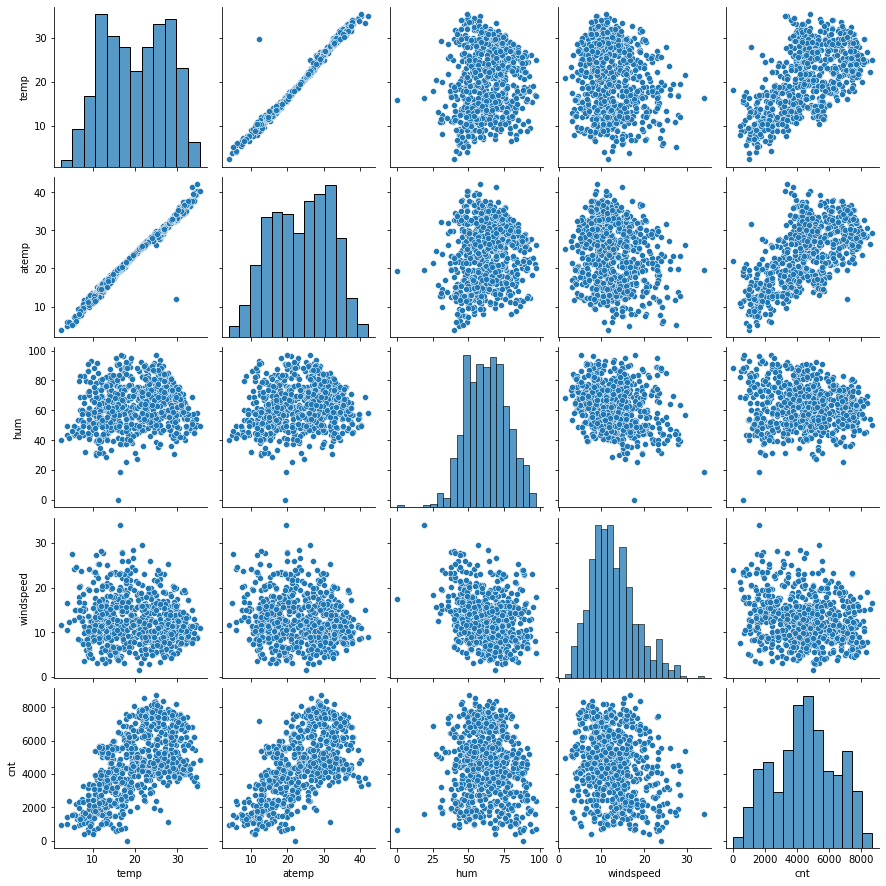

In [10]:
#Let us do analysis of the numerical variables in the data
plt.figure(figsize = (12,10) )
sns.pairplot(bike_share1)
plt.show()

<AxesSubplot:>

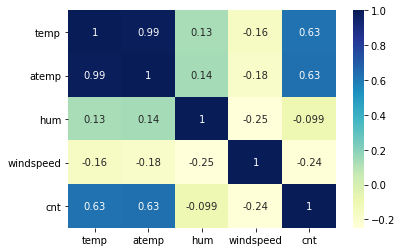

In [11]:
#Check the correlation of the variables.
sns.heatmap(bike_share1.corr(), annot=True, cmap='YlGnBu')

#### From the data we check the pairwise relation of various numerical variable.
#### 1. Temp. and atemp are linearly related/ highly correlated
#### 2. Temp , atemp and cnt have high positive correlation and windspeed has a negative correlation with cnt. Humidity on the other has the least correlation with cnt, although negative. 

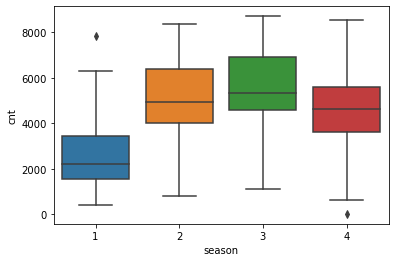

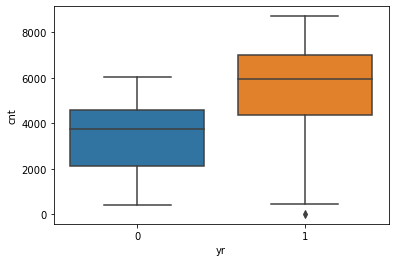

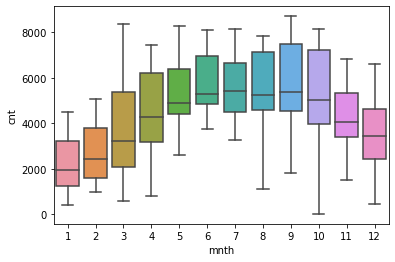

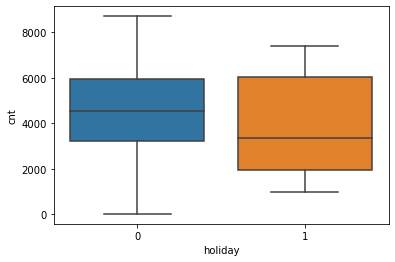

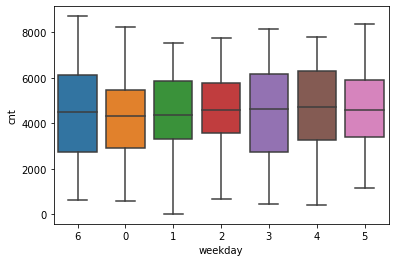

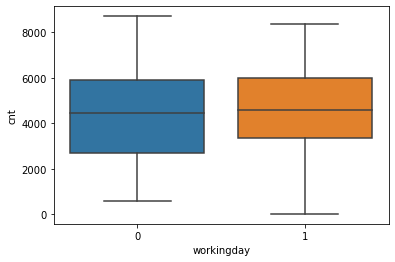

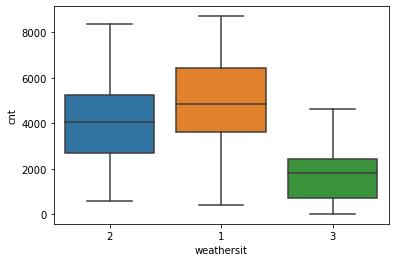

In [12]:
#Here the target variable is cnt so checking for relation of count with all other variables.
for i in range(0,len(cat_col)):
    category = cat_col[i]
    plt.figure()
    sns.boxplot(x = category, y = 'cnt', data = bike_share1)


#### The following inference can be drawn.
1. Season has very solid impact on count as the season changes count of bikes significantly changes for spring(1) the count is least and most for fall(3)
2. Year has a significant impact i.e in 2019(1) more count is there compared to 2018(0)
3. Month has a similar picture as season which is obvious as seasons are nothing but buckets various months.
4. There is a higher count for non-holiday on average, but the spread is more in holidays.
5. Weekday doesnot print a clear cut picture as almost all have the same median values.
6. Workingday also doesnot print a pretty picture as we get very little inference of count from this category.
7. Weathersit impacts the count as its obvious that when it rains/snows(3) less people are likely to use bikes compared to higher numbers on clearer days.

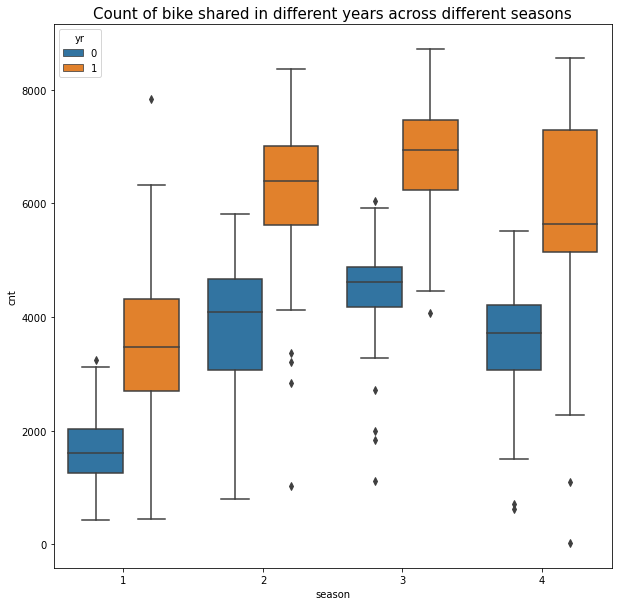

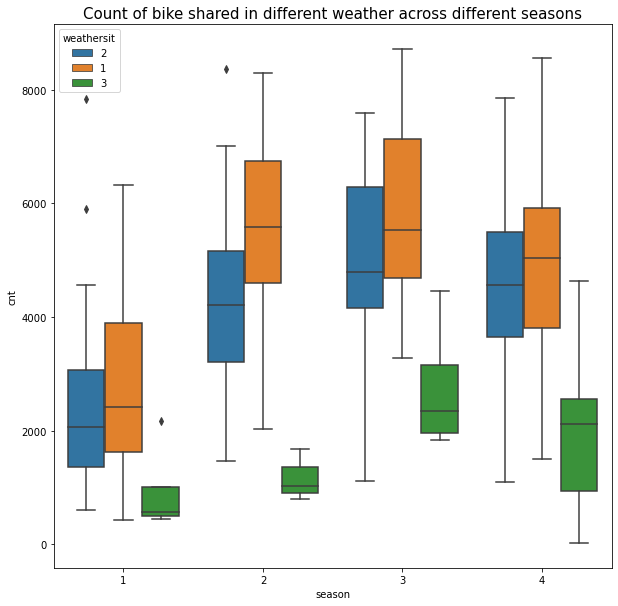

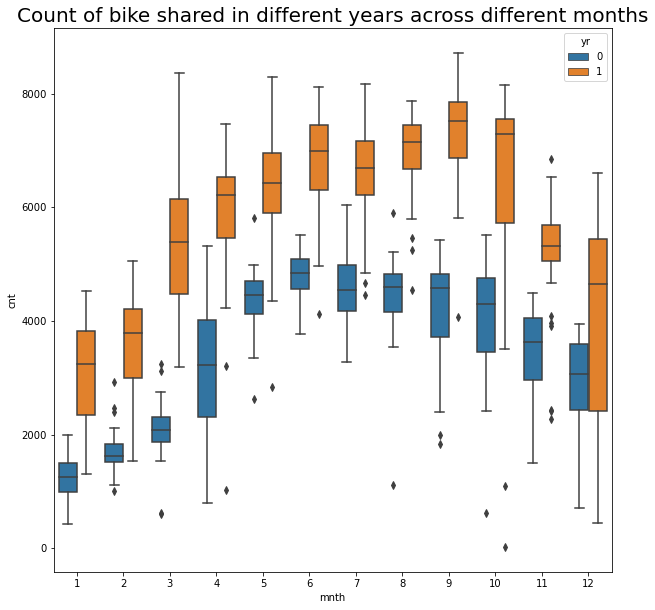

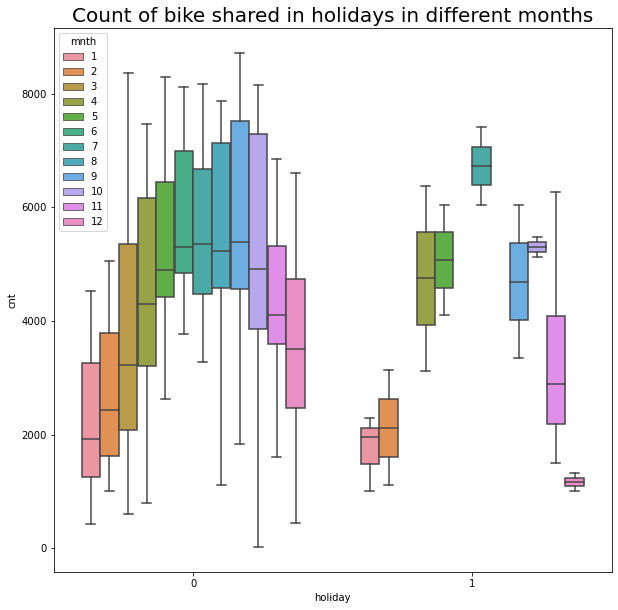

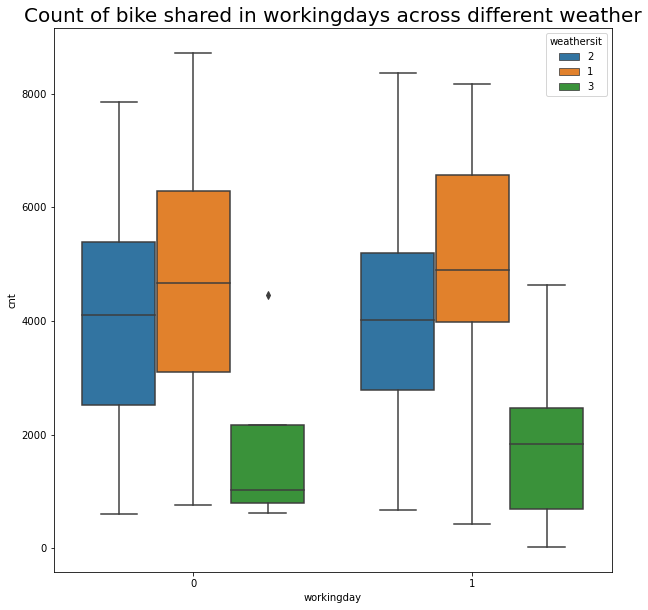

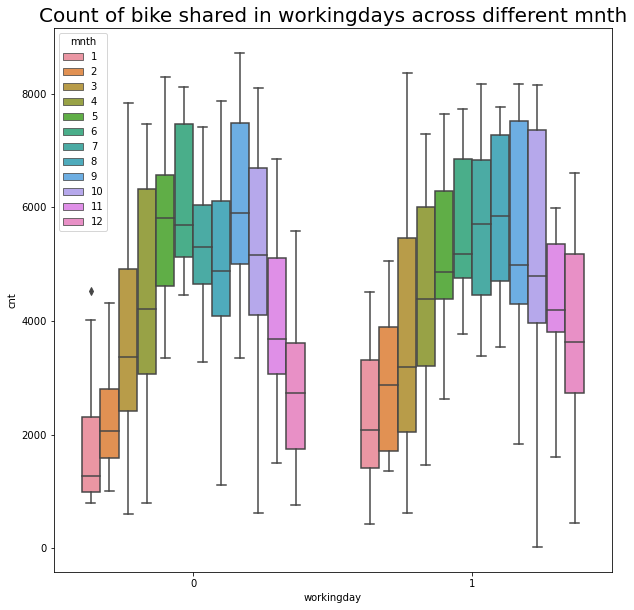

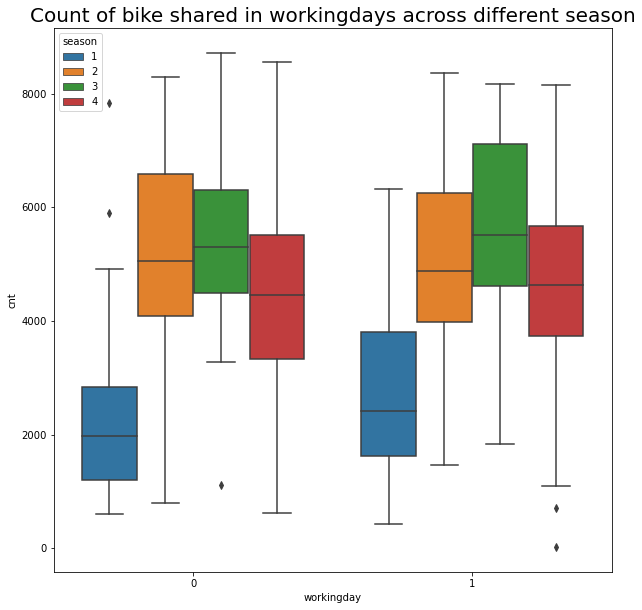

In [13]:
###Doing analysis of various categories for count of bike share.

plt.figure(figsize =(10,10))
sns.boxplot(x = 'season', y = 'cnt', data = bike_share1, hue = 'yr')
plt.title("Count of bike shared in different years across different seasons", fontsize = 15 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'season', y = 'cnt', data = bike_share1, hue = 'weathersit')
plt.title("Count of bike shared in different weather across different seasons", fontsize = 15 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share1, hue = 'yr')
plt.title("Count of bike shared in different years across different months", fontsize = 20 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share1, hue = 'mnth')
plt.title("Count of bike shared in holidays in different months", fontsize = 20 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share1, hue ='weathersit')
plt.title("Count of bike shared in workingdays across different weather", fontsize = 20 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share1, hue ='mnth')
plt.title("Count of bike shared in workingdays across different mnth", fontsize = 20 )
plt.show()

plt.figure(figsize =(10,10))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share1, hue ='season')
plt.title("Count of bike shared in workingdays across different season", fontsize = 20 )
plt.show()

#### We can also the similar conclusions that
1. Yr and season impact the count of bikes and so does the weather situation, non holiday has a higher average bike share than holidays
2. Workingday and weekday donot print a good conclusion of the count.

#### From the numerical data analysis we see that we can fit a regression line for count through the data and also our problem statement wants us to predict the data so we are going to do a multiple linear regression to the data

# 2. Data Preparation for regression

<AxesSubplot:>

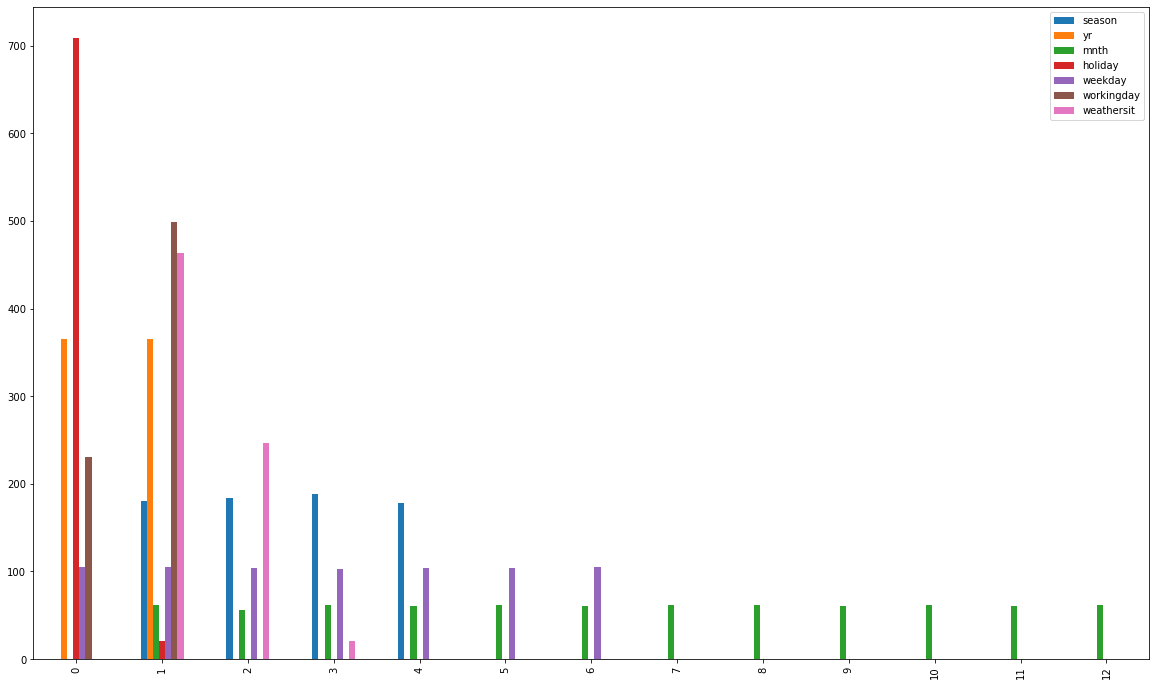

In [14]:
value_counts_derived.plot(kind ='bar', figsize=(20,12))

1. Treating categorical columns
    1. From the figure we find yr, holiday , workingday are binary variables. So we keep them as such
    2. We create dummy variables for rest of the categorical columns**

In [15]:
#Creating dummy variables for season. Create column names as per dictionary and drop redundant dummy variable.
dummy_season = pd.get_dummies(bike_share['season'], drop_first= True) #dropping the first column as spring
dummy_season.columns= ['summer', 'fall', 'winter']

#Creating dummy variables for month. Create column names as per dictionary and drop redundant dummy variable.
dummy_month = pd.get_dummies(bike_share['mnth'], drop_first= True)#dropping the first column as january
dummy_month.columns= ['Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

#Creating dummy variables for weekday. Create column names as per dictionary and drop redundant dummy variable.
dummy_day = pd.get_dummies(bike_share['weekday'], drop_first= True)#dropping the first column
dummy_day.columns= ['Wed','Thur','Fri','Sat','Sun','Mon']


#Creating dummy variables for weather. Create column names as per dictionary and drop redundant dummy variable.
dummy_weather = pd.get_dummies(bike_share['weathersit'], drop_first= True)#dropping the first column as it is redundant
dummy_weather.columns= ['Cloudy/Mist','Rain/Snow'] 


#concat all the dummy dataframes
bike_share = pd.concat([bike_share, dummy_season, dummy_month, dummy_day, dummy_weather], axis =1)
bike_share


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,1,0,0,0,1,0,0,1,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,1,0,0,0,0,1,0,1,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,1,0,0,0,0,0,1,1,0
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,1,0,0,0,0,0,0,0,0


In [16]:
#Since we have created the dummy columns we don't need the original ones.
bike_share = bike_share.drop(['season', 'mnth', 'weekday', 'weathersit'], axis =1 )
bike_share

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
bike_share.info() #we have all columns as numerical or binary type so we can proceed with linear regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   summer       730 non-null    uint8  
 9   fall         730 non-null    uint8  
 10  winter       730 non-null    uint8  
 11  Feb          730 non-null    uint8  
 12  Mar          730 non-null    uint8  
 13  Apr          730 non-null    uint8  
 14  May          730 non-null    uint8  
 15  Jun          730 non-null    uint8  
 16  Jul          730 non-null    uint8  
 17  Aug          730 non-null    uint8  
 18  Sep          730 non-null    uint8  
 19  Oct     

**2. Spliting the data to train and test set so that we prepare our model on train set and test on test set**

In [18]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import sklearn for regression
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
#spliting the data and keeping in train and test dataframes such that 70% are train set and 30% test
df_train, df_test = train_test_split(bike_share, train_size = 0.7, random_state = 100) 
df_train.shape

(510, 30)

#### We see the train set has 510 columns(70% of of our original data) 

In [20]:
bike_share.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**3. Rescalling the data as we see temp has data in range 2.5 to 35 whereas humidity varies from 0 to 95 also most columns have 0 0r 1. So it will be easier and cost effective to scale them normally**

In [21]:
from sklearn.preprocessing import MinMaxScaler #importing minmax scaler from sklearn
scaler = MinMaxScaler()
num_var = ['temp','atemp','hum', 'windspeed', 'cnt'] #choosing only the numerical variables as rest have 0 and 1
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.describe()#check for maximum for each column is 1 and minimum is 0

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

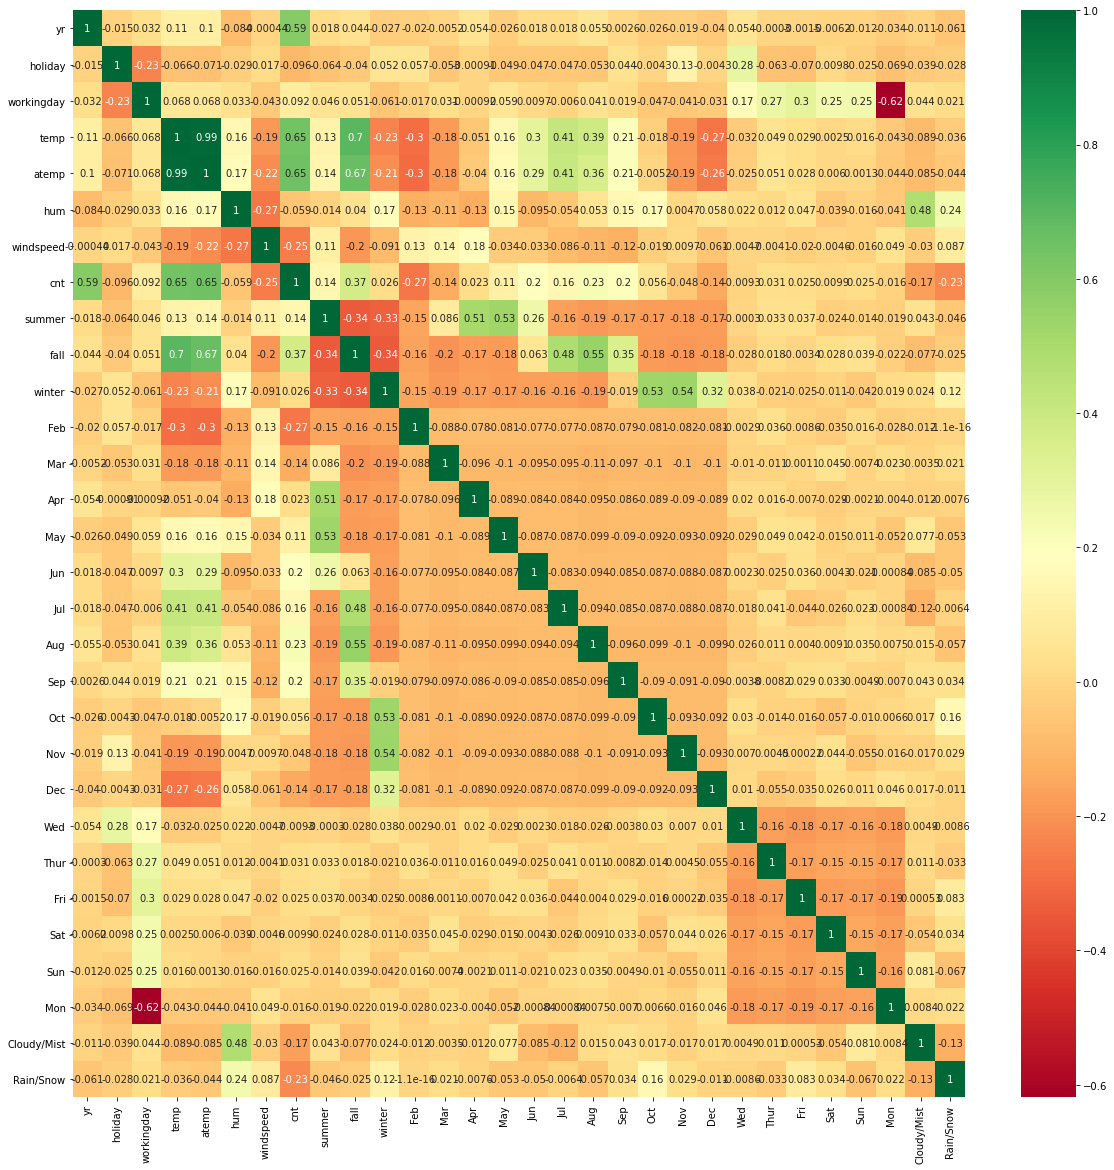

In [22]:
#Check for correlation of various columns. This will be helpful in feature selection later.
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn')

**4. Dividing X and y from train set for regression.**

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train


In [24]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,1,0,0,0,0,0,1,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

#### So y_train is now cnt and X train are all the features we are going to use for regression.

# 3. Building the linear model

In [26]:
#Using statsmodel for regression as it provides better statistical insight
import statsmodels.api as sm

In [27]:
#Statsmodels doesnot use intercept in the regression so we add a constant column to the X variables. 
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,...,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,...,0,0,0,0,0,1,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,...,0,0,0,0,1,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,...,0,1,0,0,0,0,0,1,1,0
79,1.0,0,0,1,0.462664,0.434043,0.759870,0.529881,1,0,...,0,0,1,0,0,0,0,0,1,0


#### MODEL 1 with all features

In [28]:
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()

In [29]:
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.81e-180
Time:                        23:24:04   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1758      0.030      5.774      

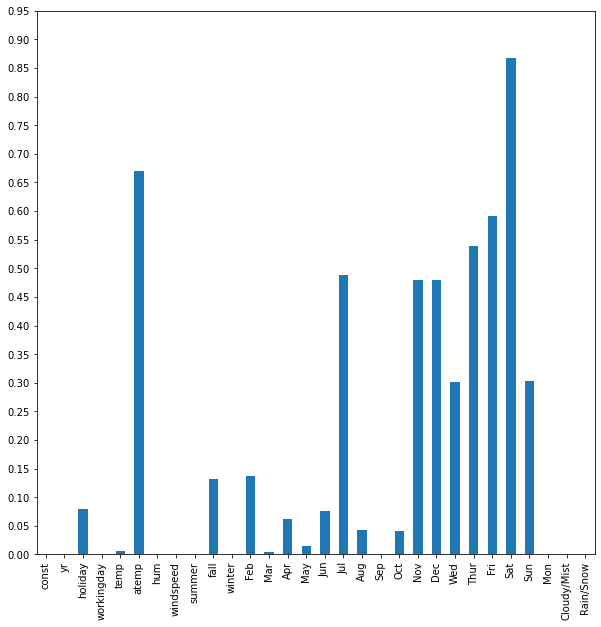

In [30]:
pvalues1 = round(lr_model1.pvalues,4)
pvalues1.plot(kind = 'bar', figsize = (10,10))
plt.yticks(np.arange(0,1,0.05))
plt.show()

#### By selecting all the features we see that our model has
1. R2 at .853 and adj. R2 at .844, also the P(F-test) = 0 (<0.05), this states the model is overally significant and explains the variance 85% of the times.
2. But when we look at the individual features there are atleast 12 features whose p-values are greater than 0.05% which concludes these features are statistically insignificant.
3. This suggests that there is multicollinearity within the features
4. Thus we have to deal with them

#### Checking multicollinearity using VIF

In [31]:
#importing VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#Checking the VIF of model1 data features
vif             = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF']      = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
2,holiday,inf
3,workingday,inf
26,Sun,inf
25,Sat,inf
24,Fri,inf
23,Thur,inf
22,Wed,inf
4,temp,66.90
0,const,60.22
5,atemp,56.03


#### We see a lot of statistically significant features have high VIF, this is a result of multicollinearity.

#### We can deal with multicollinearity by dropping the features with high p values.

#### Using RFE for feature selection

In [33]:
#importing RFE from sklearn and importing linear regression class from sklearn.linear_model method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression() #creating an object of class linearregression
lm.fit(X_train, y_train) #fitting our data to lm

rfe = RFE(lm, 15) #selecting top 15
rfe = rfe.fit(X_train, y_train) #creating object rfe which stores the recurrsive feature selection analysis

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))  #this provides the ranking of various features relevant to regression

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 2),
 ('Apr', False, 4),
 ('May', False, 3),
 ('Jun', False, 5),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Wed', False, 11),
 ('Thur', False, 12),
 ('Fri', False, 14),
 ('Sat', False, 15),
 ('Sun', False, 13),
 ('Mon', True, 1),
 ('Cloudy/Mist', True, 1),
 ('Rain/Snow', True, 1)]

In [36]:
col = X_train.columns[rfe.support_] #creating a list of top 15 features. It can be noted that the corr heatmap from above also suggests
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'Aug', 'Sep', 'Oct', 'Mon', 'Cloudy/Mist',
       'Rain/Snow'],
      dtype='object')

In [37]:
rejects = X_train.columns[~rfe.support_]#rejected features from RFE
rejects

Index(['atemp', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Wed',
       'Thur', 'Fri', 'Sat', 'Sun'],
      dtype='object')

In [38]:
X_train1 = X_train[col]
X_train1

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Aug,Sep,Oct,Mon,Cloudy/Mist,Rain/Snow
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,1,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0,0,0,0,1,0


#### MODEL 2

In [39]:
X_train_rfe = sm.add_constant(X_train1)  
lr_model_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lr_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.17e-191
Time:                        23:24:50   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1952      0.029      6.790      

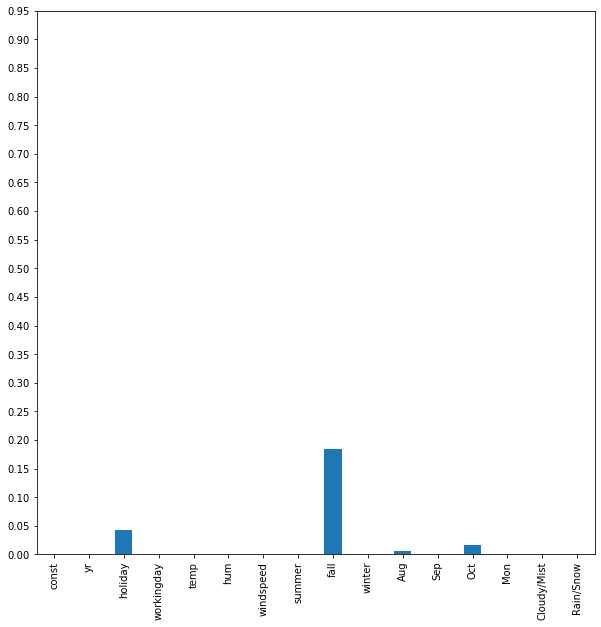

In [40]:
#check for p-values of the new model
pvalues_rfe = round(lr_model_rfe.pvalues,4)
pvalues_rfe.plot(kind = 'bar', figsize = (10,10))
plt.yticks(np.arange(0,1,0.05))
plt.show()

1. This model has almost all features with p-values <=0.05 except for fall 
2. The R2 is also close to earlier model @ 0.848 and F-statists has improved. Which suggest better overall significance.

In [41]:
#Checking the VIF of model2 data features
vif             = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF']      = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
3,temp,24.07
4,hum,17.44
7,fall,8.19
2,workingday,5.05


#### From checking the VIF for features we find temp, fall, hum and workingday have high VIF but fall has higher p- value @ 0.184. So lets drop this feature

#### MODEL 3

In [42]:
X = X_train1.drop('fall', axis =1)
X_train2 = sm.add_constant(X)
lr_model_rfe1 = sm.OLS(y_train, X_train2).fit()
print(lr_model_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.70e-192
Time:                        23:24:58   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1948      0.029      6.769      

In [43]:
#Checking the VIF of model3 data features
vif             = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05


#### MODEL 4

In [44]:
#we see holiday has a higher p-value @0.039. Lets drop this column
X = X.drop('holiday', axis =1)
X_train3 = sm.add_constant(X)
lr_model_rfe2 = sm.OLS(y_train, X_train3).fit()
print(lr_model_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.92e-192
Time:                        23:25:01   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1850      0.028      6.497      

In [45]:
#Checking the VIF of model4 data features
vif             = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
3,hum,16.06
2,temp,10.01


#### MODEL 5

In [46]:
#we see oct has a higher p-value @0.022. Lets drop this column
X = X.drop('Oct', axis =1)
X_train4 = sm.add_constant(X)

lr_model_rfe3 = sm.OLS(y_train, X_train4).fit()
print(lr_model_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.37e-192
Time:                        23:25:04   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1780      0.028      6.260      

In [47]:
#Checking the VIF of model5 data features
vif             = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
3,hum,16.03
2,temp,9.76


#### MODEL 6

In [48]:
#drop august from the data as it has p-value of 0.001
X = X.drop('Aug', axis = 1)
X_train5 = sm.add_constant(X)
lr_model_rfe4 = sm.OLS(y_train, X_train5).fit()
print(lr_model_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.10e-191
Time:                        23:25:07   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1705      0.029      5.960      

In [49]:
#Checking the VIF of model6 data features
vif             = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif[(vif['VIF'] >=5)]

,Features,VIF
3,hum,15.96
2,temp,8.12


#### MODEL 7

In [50]:
#WE find none of the features are insignificant enough so we go by VIF and drop humidity from the features
X = X.drop('hum', axis = 1)
X_train6 = sm.add_constant(X)
lr_model_rfe5 = sm.OLS(y_train, X_train6).fit()
print(lr_model_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.13e-188
Time:                        23:25:10   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0750      0.019      4.031      

In [51]:
#Checking the VIF of model6 data features
vif             = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']      = round(vif['VIF'],2)
vif             = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Mon,1.69
4,summer,1.57
8,Cloudy/Mist,1.53
5,winter,1.40
6,Sep,1.20
9,Rain/Snow,1.08


### We can settle with lr_model_rfe5 as the final model as:
1. The whole model is statistically significant as R2 = 0.835- meaning we can explain 83.5 % of variance. Also adjusted R2 is close to R2 implying the model is not overfit.
2. The F-statistic is high/probability of F-statistic is low implying that we reject the null hypothesis that intercept only model fits our data. Thus implying our regression is significant.
3. The individual p-values are 0.000 for all features which implies each feature is itself significant.
4. The VIF result(<5) shows  no multicollinearity

# 4. Residual Analysis

#### Checking for the assumptions of errors of linear regression.

1. Errors are normally distributed across a mean 0


In [52]:
y_train_pred = lr_model_rfe5.predict(X_train6)
res = y_train - y_train_pred

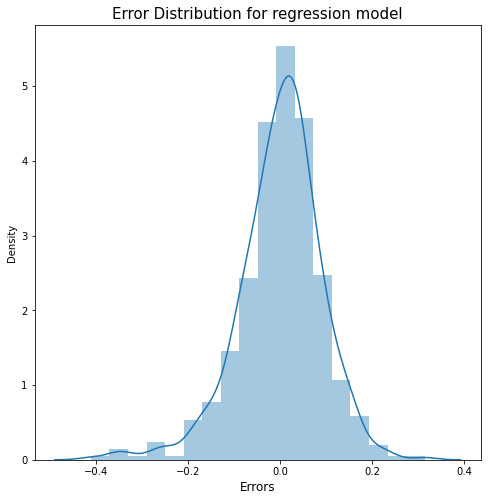

In [53]:
plt.figure(figsize =(8,8))
sns.distplot(res, bins = 18)
plt.xlabel('Errors', fontsize =12)
plt.title('Error Distribution for regression model',  fontsize =15)
plt.show()

#### The graph clearly shows the errors are normally distributed with mean 0


2. Predicted model is linear

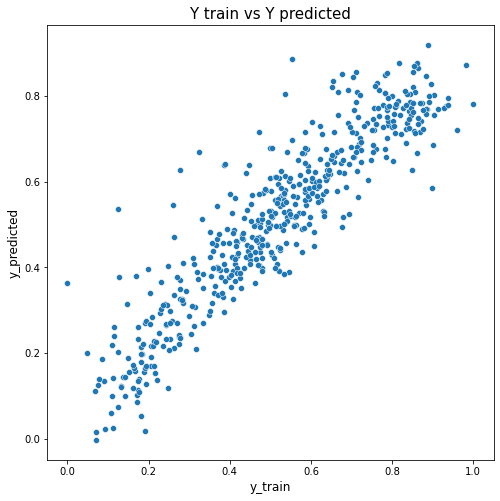

In [54]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_train,y_train_pred)
plt.title('Y train vs Y predicted', fontsize =15)
plt.xlabel('y_train', fontsize =12)
plt.ylabel('y_predicted', fontsize =12)
plt.show()

#### The picture suggests that the predicted y for every train set y follows the diagonal indicating the linearity of the model. 

3.  Homoscedasticity

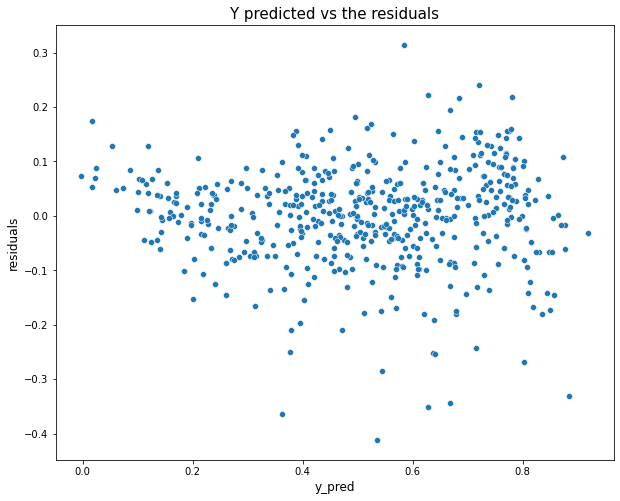

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_train_pred, res)
plt.title('Y predicted vs the residuals', fontsize =15)
plt.xlabel('y_pred', fontsize =12)
plt.ylabel('residuals', fontsize =12)
plt.show()

#### There is no such clearly recognised pattern to errors. So it can be concluded that the assumptions are valid.

# 5. Model Evaluation

In [56]:
# here we only rescale the test data to the fir of train data(i.e, we keep the minimum and maximum from the train data)
num_var = ['temp','atemp','hum', 'windspeed', 'cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

In [57]:
#creatin X and y test variables
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,Nov,Dec,Wed,Thur,Fri,Sat,Sun,Mon,Cloudy/Mist,Rain/Snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,...,0,1,0,1,0,0,0,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,1,0,0,...,0,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,...,0,0,0,0,1,0,0,0,1,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### We can see the maximum and minimum in some columns are not 1 and 0 which is obvious from the fact that we chose the fit from train set

In [60]:
X_train6.columns.drop('const') #taking the final X_train columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'Sep',
       'Mon', 'Cloudy/Mist', 'Rain/Snow'],
      dtype='object')

In [61]:
X_test= X_test[X_train6.columns.drop('const')] #dropping the X_train constant and changing the X_test columns

In [62]:
X_test_sm = sm.add_constant(X_test) #adding constant column to X_test

In [63]:
y_test_pred = lr_model_rfe5.predict(X_test_sm) #predicting y_test from our model

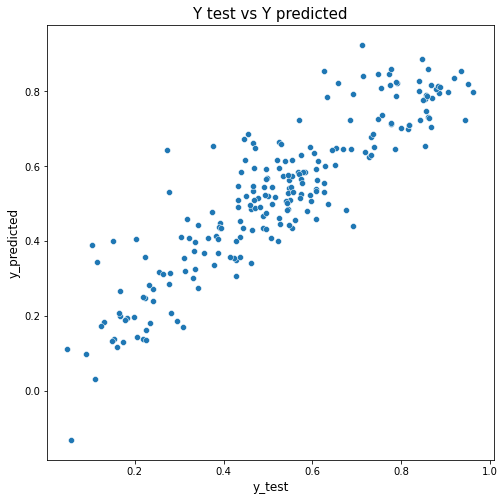

In [64]:
#Checking for linearity in the y_test predicted 
plt.figure(figsize=(8,8))
sns.scatterplot(y_test, y_test_pred)
plt.title('Y test vs Y predicted', fontsize =15)
plt.xlabel('y_test', fontsize =12)
plt.ylabel('y_predicted', fontsize =12)
plt.show()

#### The model works well on the test data as can be seen from the linearity of the graph

In [65]:
#R2 score for test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [66]:
#Finding R2 score for test data
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7961390438459766

#### The R2 score for the test data implies that almost 80% of the variance is explained by the regression. Which is a good enough metric for stating the model is stable.

In [67]:
abs(lr_model_rfe5.params).sort_values(ascending = False)

temp           0.549892
Rain/Snow      0.287090
yr             0.233139
windspeed      0.155203
winter         0.130655
Sep            0.097365
summer         0.088621
Cloudy/Mist    0.080022
const          0.075009
Mon            0.067500
workingday     0.056117
dtype: float64

In [68]:
lr_model_rfe5.params

const          0.075009
yr             0.233139
workingday     0.056117
temp           0.549892
windspeed     -0.155203
summer         0.088621
winter         0.130655
Sep            0.097365
Mon            0.067500
Cloudy/Mist   -0.080022
Rain/Snow     -0.287090
dtype: float64

#### The top 3 are temp, rain/snow(weather) and yr